<a href="https://colab.research.google.com/github/pchernic/python_for_financial_data/blob/main/Capital_Asset_Pricing_Model_(CAPM)_for_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital asset pricing model CAPM for Crypto.




---

## Exploring Cryptocurrency Returns:

This code aims to help visualize and analyze the relationship between Bitcoin and Ethereum returns. This exploration was conducted in several key steps:

1. **Data Retrieval:** We harnessed the power of Python and a variety of data sources to obtain historical data for Bitcoin and Ethereum. CoinMarketCap and Yahoo Finance were our trusted allies in securing cryptocurrency and financial market data.

2. **Data Processing:** The data collected was meticulously processed, ensuring that it was clean and ready for analysis. We calculated daily and annual returns for both Bitcoin and Ethereum, laying the groundwork for our in-depth examination.

3. **Regression Analysis:** Employing the robust capabilities of the `statsmodels` library, we delved into a linear regression analysis. This statistical method allowed us to uncover the interplay between Bitcoin and Ethereum returns and understand the degree to which they were correlated.

4. **Data Visualization:**  A scatter plot displayed the relationship between Bitcoin and Ethereum returns,

This code project serves insightful data into the realm of cryptocurrency returns.


In [1]:
pip install cryptocmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from cryptocmd import CmcScraper
import statsmodels.api as sm

In [3]:
scraper = CmcScraper("BTC")
df = scraper.get_dataframe()
df = df.set_index("Date")

df

,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
Date,,,,,,,,,,
2023-10-18,28413.530808,28889.009589,28174.252551,28328.341152,1.272413e+10,5.529012e+11,2023-10-18T00:00:00.000Z,2023-10-18T04:58:00.000Z,2023-10-18T14:38:00.000Z,2023-10-18T23:59:59.999Z
2023-10-17,28522.098166,28618.752390,28110.186117,28415.748140,1.487253e+10,5.545820e+11,2023-10-17T00:00:00.000Z,2023-10-17T17:01:00.000Z,2023-10-17T04:08:00.000Z,2023-10-17T23:59:59.999Z
2023-10-16,27162.628229,29448.139037,27130.473478,28519.466679,2.783388e+10,5.565775e+11,2023-10-16T00:00:00.000Z,2023-10-16T13:33:00.000Z,2023-10-16T00:46:00.000Z,2023-10-16T23:59:59.999Z
2023-10-15,26858.011726,27289.170319,26817.894010,27159.652919,7.098202e+09,5.300170e+11,2023-10-15T00:00:00.000Z,2023-10-15T22:12:00.000Z,2023-10-15T13:06:00.000Z,2023-10-15T23:59:59.999Z
2023-10-14,26866.203245,26968.999218,26814.586586,26861.706203,5.388117e+09,5.241741e+11,2023-10-14T00:00:00.000Z,2023-10-14T03:38:00.000Z,2023-10-14T21:30:00.000Z,2023-10-14T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013-05-02T00:00:00.000Z,2013-05-02T14:25:01.000Z,2013-05-02T14:30:02.000Z,2013-05-02T23:59:59.999Z
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013-05-01T00:00:00.000Z,2013-05-01T00:15:01.000Z,2013-05-01T19:55:01.000Z,2013-05-01T23:59:59.999Z
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013-04-30T00:00:00.000Z,2013-04-30T08:25:02.000Z,2013-04-30T18:55:01.000Z,2013-04-30T23:59:59.999Z


In [4]:
tbond10 =  yf.download('IEF', "2017-01-01", "2023-04-23")['Adj Close']
tbond10 = tbond10.resample("Y").last().pct_change().dropna()
tbond10

[*********************100%%**********************]  1 of 1 completed


Date
2018-12-31    0.009877
2019-12-31    0.080295
2020-12-31    0.100067
2021-12-31   -0.033278
2022-12-31   -0.151552
2023-12-31    0.035496
Freq: A-DEC, Name: Adj Close, dtype: float64

In [6]:
# Calculate annual percentage changes and filter the data
df_bitcoin_annual = df['Close'].resample("Y").last().pct_change().dropna()

# Filter data starting from January 1, 2018
df_bitcoin_annual = df_bitcoin_annual.loc[df_bitcoin_annual.index > "2017-12-31"]

# Display the resulting DataFrame
df_bitcoin_annual


Date
2018-12-31   -0.735618
2019-12-31    0.922034
2020-12-31    3.031601
2021-12-31    0.596679
2022-12-31   -0.642652
2023-12-31    0.711941
Freq: A-DEC, Name: Close, dtype: float64

In [8]:
# Calculate the risk premium
risk_premium = df_bitcoin_annual - tbond10

# Calculate the mean (average) risk premium
mean_risk_premium = risk_premium.mean()

print("Mean Risk Premium:", mean_risk_premium)


Mean Risk Premium: 0.6405133821731323


In [9]:
# Calculate the expected return
expected_return = tbond10.loc['2023-12-31'] + 0.96 * (mean_risk_premium - tbond10.loc['2023-12-31'])

print("Expected Return:", expected_return)


Expected Return: 0.6163126845606123


In [10]:
scraper = CmcScraper("ETH")
df_eth = scraper.get_dataframe()
df_eth = df_eth.set_index("Date")

df_eth

,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
Date,,,,,,,,,,
2023-10-18,1565.382837,1584.726874,1556.736376,1563.749884,4.354139e+09,1.880601e+11,2023-10-18T00:00:00.000Z,2023-10-18T11:21:00.000Z,2023-10-18T21:39:00.000Z,2023-10-18T23:59:59.999Z
2023-10-17,1600.635595,1601.294707,1554.402964,1565.439566,5.032687e+09,1.882612e+11,2023-10-17T00:00:00.000Z,2023-10-17T00:07:00.000Z,2023-10-17T19:02:00.000Z,2023-10-17T23:59:59.999Z
2023-10-16,1558.313508,1628.156280,1555.989593,1600.534276,8.846929e+09,1.924799e+11,2023-10-16T00:00:00.000Z,2023-10-16T13:33:00.000Z,2023-10-16T00:45:00.000Z,2023-10-16T23:59:59.999Z
2023-10-15,1555.076098,1565.760826,1550.554563,1558.069793,2.923338e+09,1.873706e+11,2023-10-15T00:00:00.000Z,2023-10-15T22:12:00.000Z,2023-10-15T00:39:00.000Z,2023-10-15T23:59:59.999Z
2023-10-14,1552.263809,1560.325075,1545.738758,1555.256809,2.429215e+09,1.870295e+11,2023-10-14T00:00:00.000Z,2023-10-14T21:10:00.000Z,2023-10-14T11:49:00.000Z,2023-10-14T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,6.456929e+07,2015-08-11T00:00:00.000Z,2015-08-11T20:39:29.000Z,2015-08-11T06:29:29.000Z,2015-08-11T23:59:59.999Z
2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,4.281836e+07,2015-08-10T00:00:00.000Z,2015-08-10T18:54:31.000Z,2015-08-10T07:34:32.000Z,2015-08-10T23:59:59.999Z
2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,4.239957e+07,2015-08-09T00:00:00.000Z,2015-08-09T06:44:29.000Z,2015-08-09T01:49:30.000Z,2015-08-09T23:59:59.999Z


In [11]:
df_btc = df.loc[df.index >= "2015-08-07"]
df_eth = df_eth[df_eth.index >= "2015-08-07"]

In [13]:
# Calculate daily returns for Ethereum and Bitcoin
eth_returns = df_eth['Close'].pct_change().dropna()
btc_returns = df_btc['Close'].pct_change().dropna()


These lines of code set up and perform a linear regression analysis between Bitcoin returns (X) and Ethereum returns (Y).

In this code:

- `X` represents the independent variable, which is Bitcoin returns (btc_returns), with a constant term added. The constant term is added to account for the intercept in the linear regression.
- `Y` represents the dependent variable, which is Ethereum returns (eth_returns).
- The code fits a linear regression model using the `sm.OLS` function, which models the relationship between Bitcoin returns and Ethereum returns.
- It then prints the regression coefficient (slope), which indicates the relationship between Bitcoin and Ethereum returns, and the R-squared value, which measures the goodness of fit of the regression model.

This analysis **helps understanding how changes in Bitcoin returns relate to changes in Ethereum returns and assesses the quality of the linear regression model.**

In [15]:
# Set up the independent variable (X) as Bitcoin returns and add a constant term
X = btc_returns
X = sm.add_constant(X)

# Set up the dependent variable (Y) as Ethereum returns
Y = eth_returns

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the regression coefficient (slope)
print("Regression Coefficient (Slope):", model.params[1])

# Print the R-squared value
print("R-squared:", model.rsquared)


Regression Coefficient (Slope): 0.962569528952132
R-squared: 0.24150849865489865


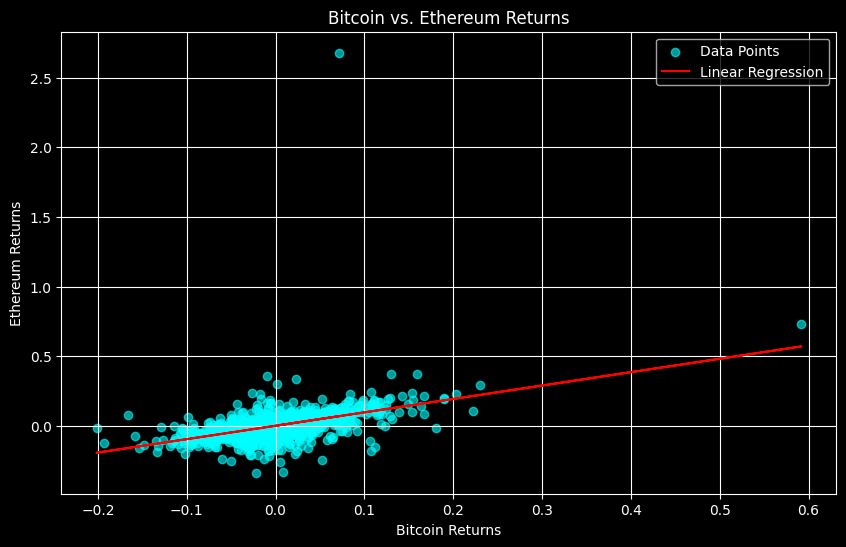

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of Bitcoin returns (X) vs. Ethereum returns (Y)
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')  # Set a dark background

# Customize plot colors
data_color = 'cyan'  # Color for data points
regression_line_color = 'magenta'  # Color for the regression line

# Create the scatter plot
plt.scatter(X.iloc[:, 1], Y, alpha=0.6, color=data_color, label="Data Points")

# Add labels and title
plt.xlabel("Bitcoin Returns")
plt.ylabel("Ethereum Returns")
plt.title("Bitcoin vs. Ethereum Returns")

# Add grid
plt.grid(True)

# Plot the linear regression line
plt.plot(X.iloc[:, 1], model.predict(X), color='red', label="Linear Regression")
plt.legend()

# Show the plot
plt.show()
